# Credit Card Fraud Detection #

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import FixedLocator
import plotly.express as px

In [2]:
sns.set(rc = {'figure.figsize':(15,8)})
df=pd.read_csv('fraudTrain.csv') 
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.isnull().count()

Unnamed: 0               1296675
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [9]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [10]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Remove Duplicates #

In [11]:
df.drop_duplicates(inplace=True)

# Data Analysis #

# Transaction amount vs Fraud #

In [12]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [13]:
np.percentile(df['amt'],99)

545.9926000000002

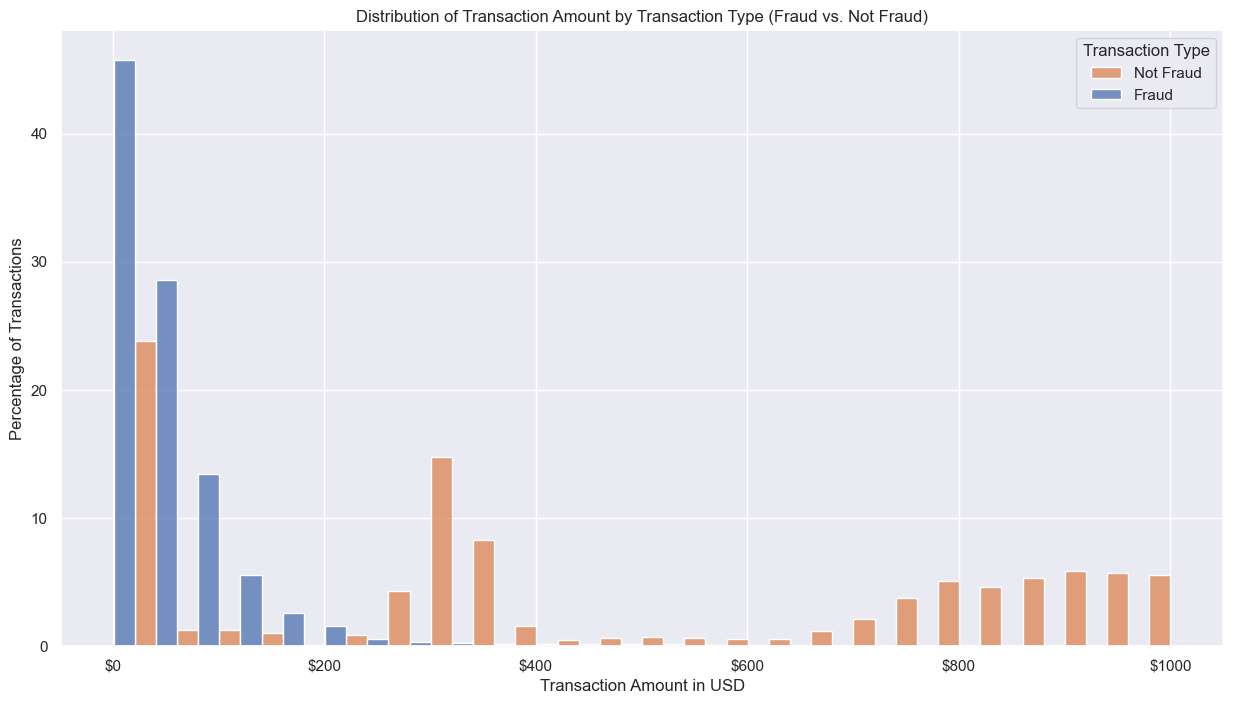

In [14]:
# Create the histogram
ax = sns.histplot(x='amt', data=df[df.amt <= 1000], hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=25)

ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Transaction Amount in USD')

# Set a more descriptive title
plt.title('Distribution of Transaction Amount by Transaction Type (Fraud vs. Not Fraud)')

# Add a legend with meaningful labels
plt.legend(title='Transaction Type', labels=['Not Fraud', 'Fraud'])

# Set the x-axis locator to FixedLocator
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))

# Set the x-axis tick labels
ax.set_xticklabels(['${:.0f}'.format(x) for x in ax.get_xticks()])

plt.show()


# Gender vs Fraud #

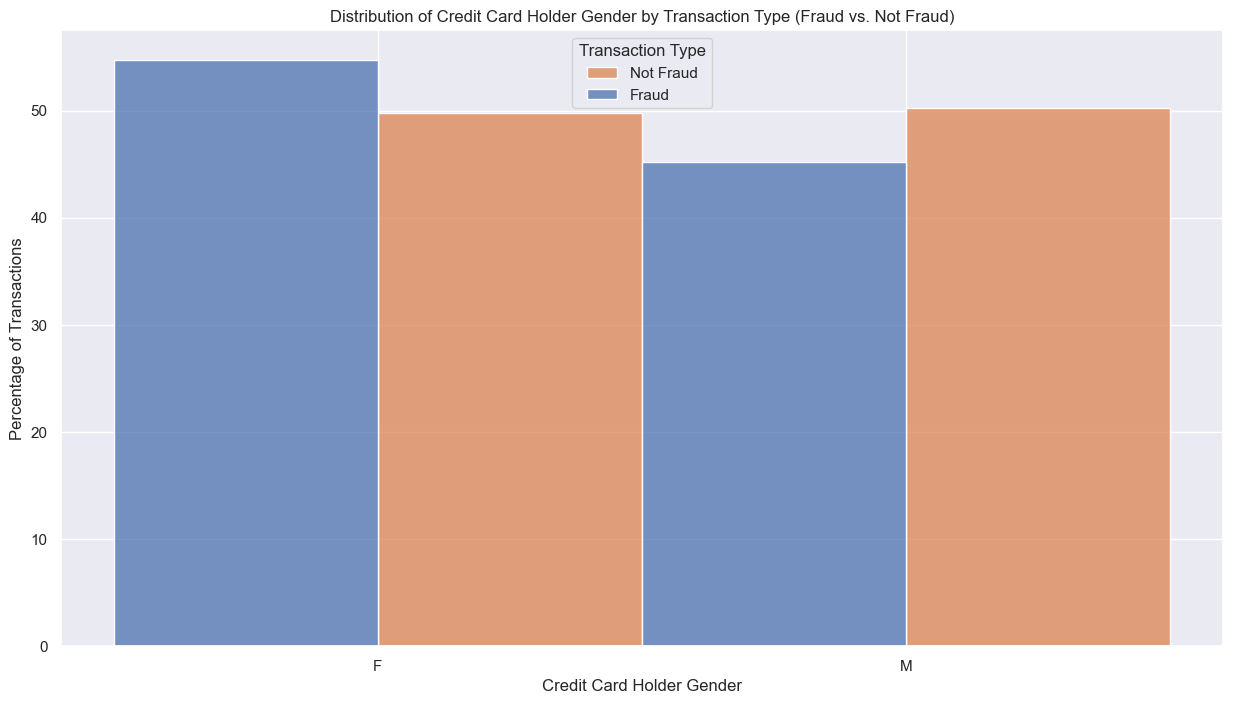

In [15]:
# Create the histogram
ax = sns.histplot(x='gender', data=df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, element='bars')

ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Credit Card Holder Gender')

# Set a more descriptive title
plt.title('Distribution of Credit Card Holder Gender by Transaction Type (Fraud vs. Not Fraud)')

# Add a legend with meaningful labels
plt.legend(title='Transaction Type', labels=['Not Fraud', 'Fraud'])

plt.show()


# Spending amount vs Fraud #

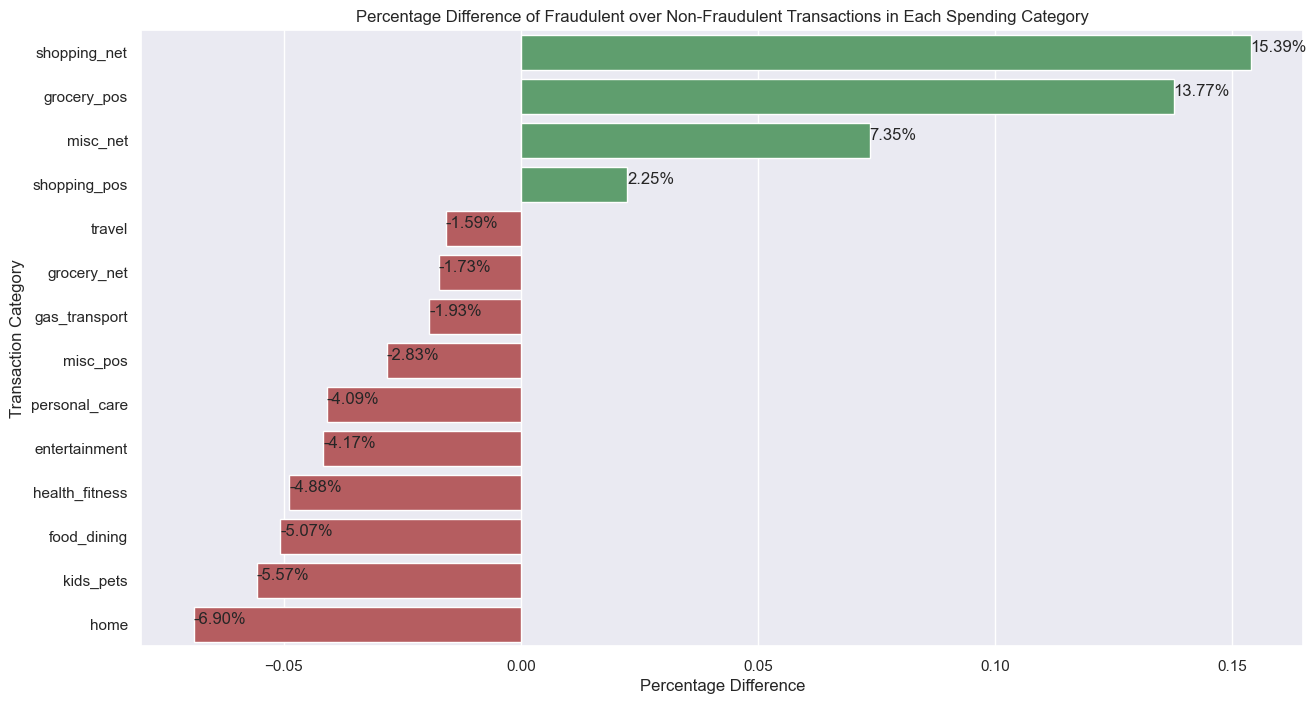

In [16]:
# Calculate the percentage differences
a = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns = ['category', 'not fraud percentage']

b = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns = ['category', 'fraud percentage']

ab = a.merge(b, on='category')
ab['diff'] = ab['fraud percentage'] - ab['not fraud percentage']

# Sort the data by the percentage difference
ab = ab.sort_values('diff', ascending=False)

# Define color palette for positive and negative differences
colors = ['g' if diff > 0 else 'r' for diff in ab['diff']]

# Create the bar plot
ax = sns.barplot(y='category', x='diff', data=ab, palette=colors)
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Percentage Difference of Fraudulent over Non-Fraudulent Transactions in Each Spending Category')

# Add annotations to the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f"{ab['diff'].iloc[i] * 100:.2f}%", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left')

plt.show()


# Age vs Fraud #

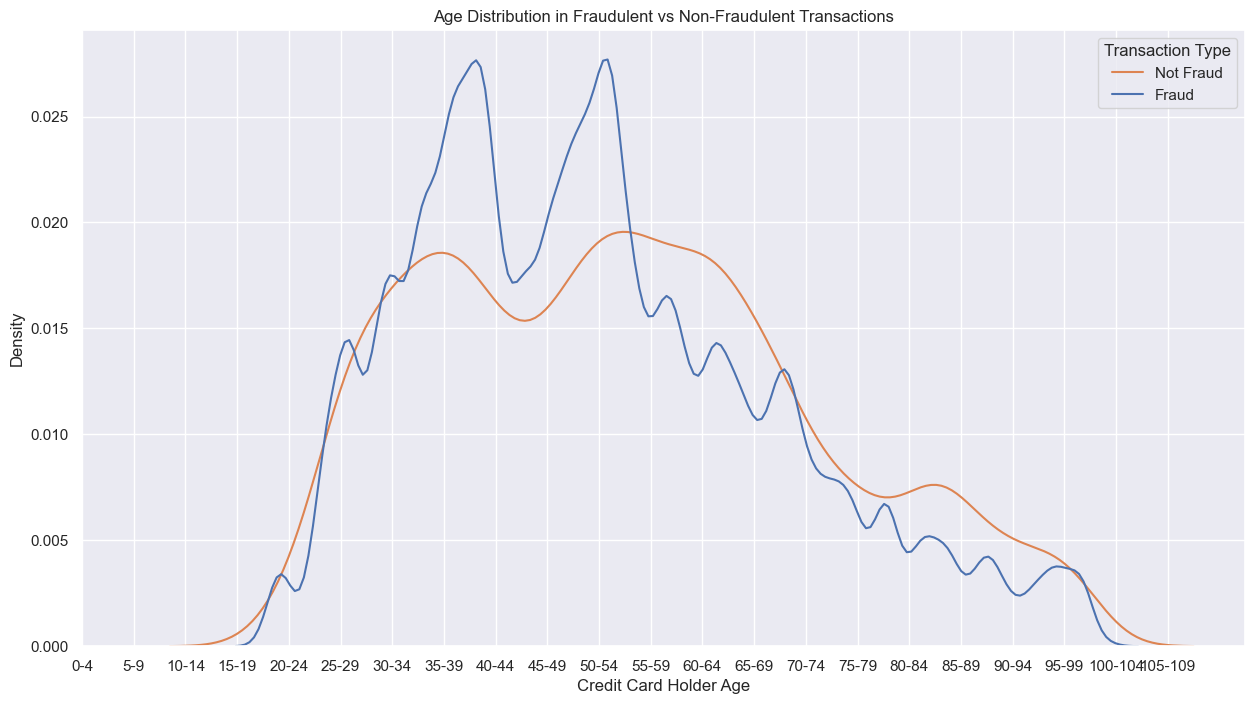

In [17]:
import datetime as dt

# Calculate the age of credit card holders
df['age'] = dt.date.today().year - pd.to_datetime(df['dob']).dt.year

# Create a KDE plot
ax = sns.kdeplot(x='age', data=df, hue='is_fraud', common_norm=False)

ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')

# Set custom x-axis ticks and labels
age_ticks = np.arange(0, 110, 5)
plt.xticks(age_ticks, ['{}-{}'.format(start, start + 4) for start in age_ticks])

# Set a more descriptive title
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')

# Add a legend with meaningful labels
plt.legend(title='Transaction Type', labels=['Not Fraud', 'Fraud'])

plt.show()


# Seasonality of Credit Card Fraud #

# Hourly Trend #

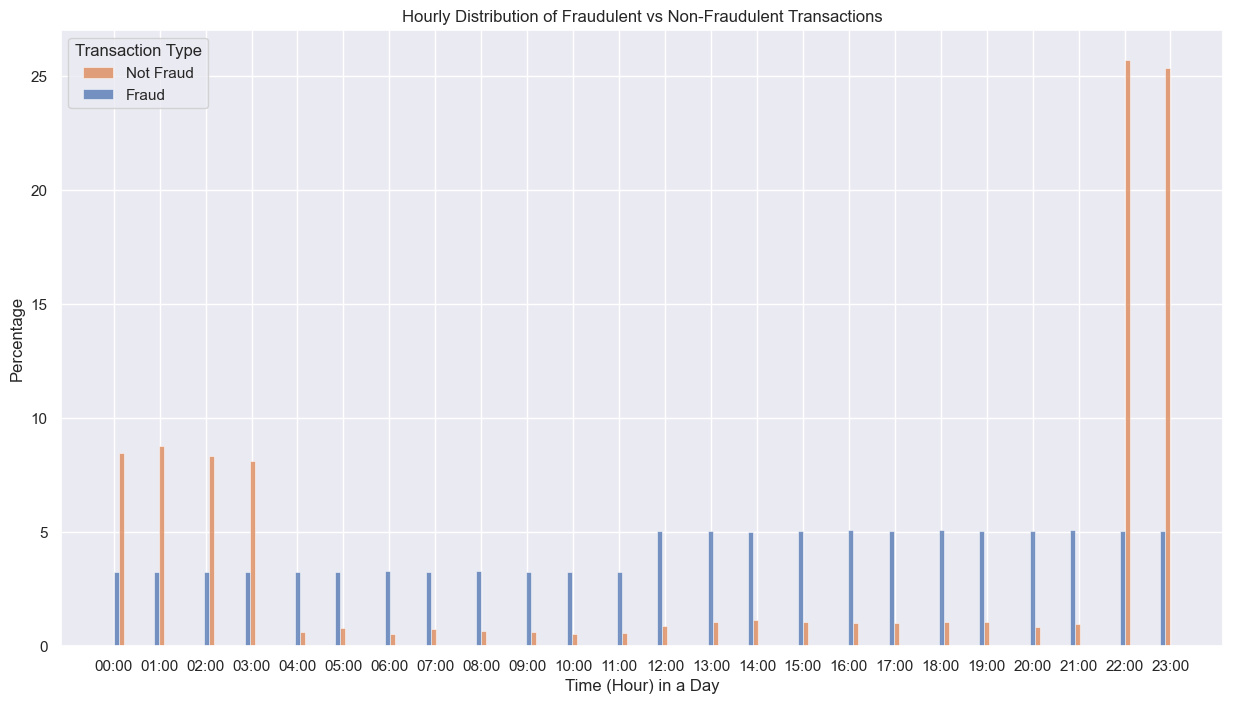

In [18]:
# Calculate the hour of the day
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour

# Create a histogram
ax = sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')

# Set x-axis ticks for each hour
hour_ticks = np.arange(0, 24, 1)
plt.xticks(hour_ticks, [f"{hour:02d}:00" for hour in hour_ticks])

# Set a more descriptive title
plt.title('Hourly Distribution of Fraudulent vs Non-Fraudulent Transactions')

# Add a legend with meaningful labels
plt.legend(title='Transaction Type', labels=['Not Fraud', 'Fraud'])

plt.show()


# Weekly Trend #

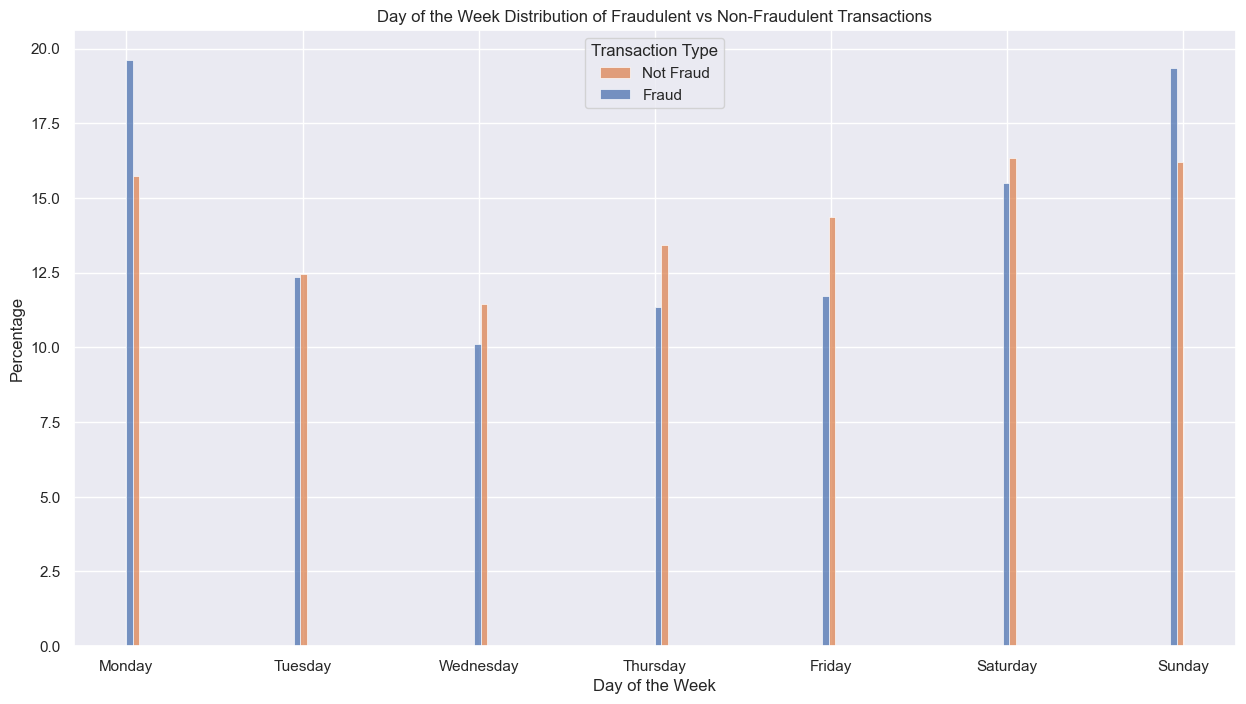

In [19]:
# Calculate the day of the week (0=Monday, 6=Sunday)
df['day'] = pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek

# Create a histogram
ax = sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

# Define custom x-axis labels for days of the week
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax.set_xticks(range(7))
ax.set_xticklabels(day_labels)

ax.set_ylabel('Percentage')
ax.set_xlabel('Day of the Week')

# Set a more descriptive title
plt.title('Day of the Week Distribution of Fraudulent vs Non-Fraudulent Transactions')

# Add a legend with meaningful labels
plt.legend(title='Transaction Type', labels=['Not Fraud', 'Fraud'])

plt.show()

# Monthly Trend #

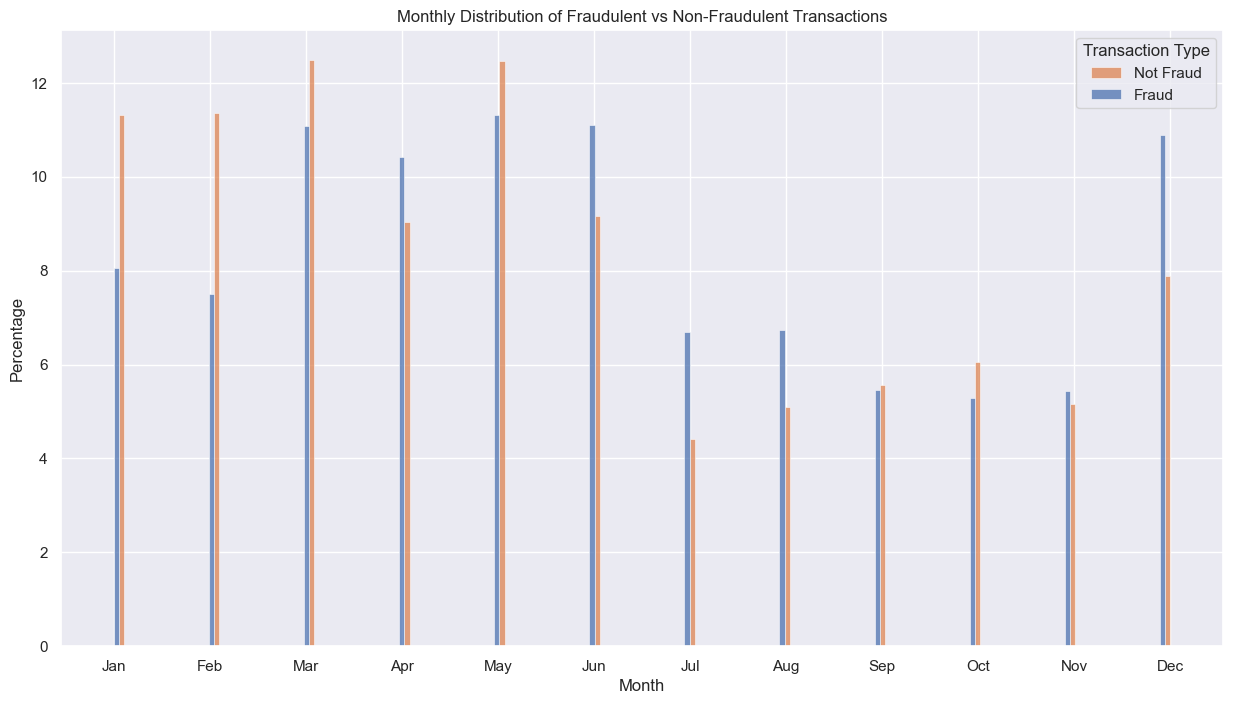

In [20]:
# Calculate the month
df['month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month

# Create a histogram
ax = sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')

# Define custom x-axis labels for months
month_labels = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_labels)

ax.set_ylabel('Percentage')
ax.set_xlabel('Month')

# Set a more descriptive title
plt.title('Monthly Distribution of Fraudulent vs Non-Fraudulent Transactions')

# Add a legend with meaningful labels
plt.legend(title='Transaction Type', labels=['Not Fraud', 'Fraud'])

plt.show()


# State vs Fraud #

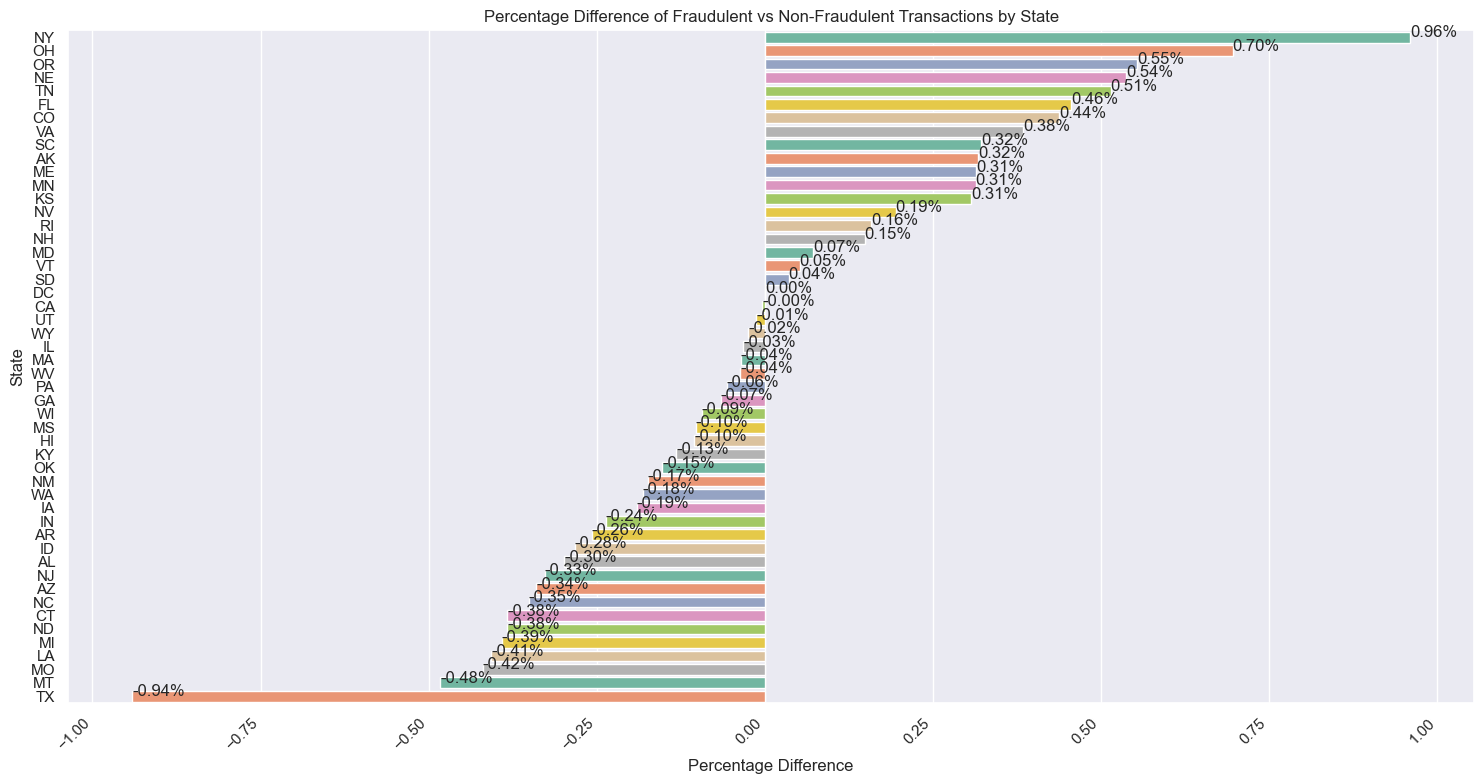

In [21]:
# Calculate the percentage of non-fraudulent transactions by state
non_fraud_percentage = df[df['is_fraud'] == 0]['state'].value_counts(normalize=True).reset_index()
non_fraud_percentage.columns = ['State', 'Non-Fraud Percentage']

# Calculate the percentage of fraudulent transactions by state
fraud_percentage = df[df['is_fraud'] == 1]['state'].value_counts(normalize=True).reset_index()
fraud_percentage.columns = ['State', 'Fraud Percentage']

# Merge the two dataframes
merged = non_fraud_percentage.merge(fraud_percentage, on='State')

# Calculate the percentage difference
merged['Percentage Difference'] = (merged['Fraud Percentage'] - merged['Non-Fraud Percentage']) * 100

# Sort the values by the percentage difference
merged = merged.sort_values('Percentage Difference', ascending=False)

# Create a clear color palette for the bars
colors = sns.color_palette("Set2", len(merged))

# Create a bar plot
ax1 = sns.barplot(data=merged, x='Percentage Difference', y='State', palette=colors)

# Add value labels to the bars
for i, p in enumerate(ax1.patches):
    ax1.annotate(f"{merged['Percentage Difference'].iloc[i]:.2f}%", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left')

# Set labels and title
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('Percentage Difference of Fraudulent vs Non-Fraudulent Transactions by State')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve the layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


# Data Modeling and Prediction #

In [22]:
# Subset the training data to include only the features you need
selected_features = [
    'category', 'amt', 'zip', 'lat', 'long', 'city_pop',
    'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud'
]
train = df[selected_features]

# Convert the 'category' feature to dummy variables
train = pd.get_dummies(train, columns=['category'], drop_first=True)

# Separate the target variable (is_fraud) and the features
y_train = train['is_fraud'].values
X_train = train.drop("is_fraud", axis=1).values

# Print the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Print the first few rows of X_train and y_train
print("X_train sample:")
print(X_train[:5])  # Print the first 5 rows
print("y_train sample:")
print(y_train[:5])  # Print the corresponding y values for the first 5 rows


X_train shape: (1296675, 24)
y_train shape: (1296675,)
X_train sample:
[[ 4.97000000e+00  2.86540000e+04  3.60788000e+01 -8.11781000e+01
   3.49500000e+03  3.60112930e+01 -8.20483150e+01  3.50000000e+01
   0.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.07230000e+02  9.91600000e+04  4.88878000e+01 -1.18210500e+02
   1.49000000e+02  4.91590470e+01 -1.18186462e+02  4.50000000e+01
   0.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.20110000e+02  8.32520000e+04  4.21808000e+01 -1.12262000e+02
   4.15400000e+03  4.31507040e+01 -1.12154481e+02  6.10000000e+01
   

In [23]:
# Load the testing dataset
test = pd.read_csv('fraudTest.csv')

# Calculate the 'age' feature
test['age'] = dt.date.today().year - pd.to_datetime(test['dob']).dt.year

# Calculate additional time-related features
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day'] = pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month'] = pd.to_datetime(test['trans_date_trans_time']).dt.month

# Select the desired features and 'is_fraud' target variable
test = test[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud']]

# Convert the 'category' feature to dummy variables
test = pd.get_dummies(test, columns=['category'], drop_first=True)

# Separate the target variable (is_fraud) and the features
y_test = test['is_fraud'].values
X_test = test.drop("is_fraud", axis=1).values


In [24]:
# Print the shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Print the first few rows of X_test and y_test
print("X_test sample:")
print(X_test[:5])  # Print the first 5 rows
print("y_test sample:")
print(y_test[:5])  # Print the corresponding y values for the first 5 rows


X_test shape: (555719, 24)
y_test shape: (555719,)
X_test sample:
[[ 2.86000000e+00  2.92090000e+04  3.39659000e+01 -8.09355000e+01
   3.33497000e+05  3.39863910e+01 -8.12007140e+01  5.50000000e+01
   1.20000000e+01  6.00000000e+00  6.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.98400000e+01  8.40020000e+04  4.03207000e+01 -1.10436000e+02
   3.02000000e+02  3.94504980e+01 -1.09960431e+02  3.30000000e+01
   1.20000000e+01  6.00000000e+00  6.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.12800000e+01  1.17100000e+04  4.06729000e+01 -7.35365000e+01
   3.44960000e+04  4.04958100e+01 -7.41961110e+01  5.30000000e+01
   1.200

# Decision Tree #

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
predicted=clf.predict(X_test)
print('Classification report:\n',classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.76      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.88      0.87    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552928    646]
 [   514   1631]]
Share of Non-Fraud in Test Data: 0.9961


# Logistic Regression #

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the Logistic Regression classifier on the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
predicted = model.predict(X_test)

print('Classification report:\n', classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

print('Share of Non-Fraud in Test Data:', 1 - round(y_test.sum() / len(y_test), 4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion matrix:
 [[553224    350]
 [  2145      0]]
Share of Non-Fraud in Test Data: 0.9961
